In [1]:
import numpy as np
import mylibrary.nnlib as tnn
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import copy

matplotlib.rcParams['figure.figsize'] = (12, 8)

#### Dataset 0

In [2]:
num_points = 50
X1 = np.linspace(-2.5, 1.5, num_points)
X2 = np.linspace(-2, 4, num_points)
X1, X2 = np.meshgrid(X1, X2)
Y = np.sin(np.sqrt(X1**2 + X2**2))*2-1.

#### Dataset 1

In [3]:
# x1min, x1max, nx1 = -5, 4, 75
# x2min, x2max, nx2 = -3, 7, 75
# x1, x2 = np.linspace(x1min, x1max, nx1), np.linspace(x2min, x2max, nx2)
# X1, X2 = np.meshgrid(x1, x2)

# def gaussian(x1, x2, x10, x20, x1alpha, x2alpha, A):
#     return A * np.exp( -((x1-x10)/x1alpha)**2 -((x2-x20)/x2alpha)**2)

# gprms = [(0, 2, 2.5, 5.4, 1.5),
#          (-1, 4, 6, 2.5, 1.8),
#          (-3, -0.5, 1, 2, 4),
#          (3, 0.5, 2, 1, 5)
#         ]
# Y = np.zeros(X1.shape)
# for p in gprms:
#     Y += gaussian(X1, X2, *p)

#### Scaling/Plotting the data

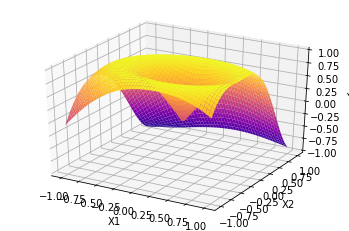

In [4]:
####Scaling the data to range -1,1
X1 = 2*(X1 - X1.min())/(X1.max() - X1.min()) -1
X2 = 2*(X2 - X2.min())/(X2.max() - X2.min()) -1
Y = 2*(Y - Y.min())/(Y.max() - Y.min()) -1

x1 = X1.reshape(-1)
x2 = X2.reshape(-1)

%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
# ax.scatter(X1, X2, Y)
ax.plot_surface(X1, X2, Y, cmap='plasma')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

In [5]:
xx = np.c_[x1, x2]
yy = Y.reshape(-1,1)

## Linear function as a decision boundary

In [19]:
optimizer = tnn.Adam()
prob = tnn.LinearLayer(2,1,optimizer=optimizer)
# prob = tnn.NonLinearLayer(2,1, activation=tnn.Sigmoid(), optimizer=optimizer)
linear0 = tnn.LinearLayer(1,1, optimizer=optimizer)
linear1 = tnn.LinearLayer(1,1, optimizer=optimizer)
bias = tnn.BiasLayer(1, optimizer=optimizer)

# gaussian = tnn.Gaussian()

In [20]:
%matplotlib tk
fig = plt.figure()
ax = fig.gca(projection='3d')

for epoch in range(100000):

    pout = prob.forward(xx)
    ## Using this makes the function continuous
    ## Breaking this makes it discontinuous
#     linear0.bias*=0.
#     linear1.bias*=0.

    bias.bias *= 0
    
    l0 = linear0.forward(pout)
    l1 = linear1.forward(pout)
    
    mask0 = pout>0
    mask1 = ~mask0    

    y0 = l0*mask0
    y1 = l1*mask1
    
    yout_ = y0 + y1
    yout = bias.forward(yout_)
    
    dy = yout - yy
    
    dy_ = bias.backward(dy)
    dy0 = dy_
    dy1 = dy_
    
    dl0 = dy0*(mask0)
    dl1 = dy1*(mask1)
    
    dpout0 = linear0.backward(dl0)
    dpout1 = linear1.backward(dl1)
#     print(np.count_nonzero(dpout0)+ np.count_nonzero(dpout1), len(dpout0))
#     break
#     dpout_ = dy0*l0*mask0 + dy1*l1*mask1
    
    dpout = dpout0 + dpout1
#     dpout = dy
    dx = prob.backward(dpout)#*gaussian.forward(pout))
    
    prob.update()
    linear0.update()
    linear1.update()
    bias.update()
    
    if epoch%100 == 0:
        
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear()
        
        ax.scatter(X1, X2, Y)
        ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
        
#         linexx = pout#np.zeros_like(pout)
#         linexx = linexx - prob.bias
#         linexx = linexx@np.linalg.pinv(prob.weights)
#         ax.scatter(linexx[:,0], linexx[:,1], np.zeros_like(yout.reshape(-1)), color='r', marker='.')
        
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  10.885004844193531


100 Error =  0.9145292486223677


200 Error =  0.3718685569726363


300 Error =  0.3172315958672136


400 Error =  0.29929046953041394


500 Error =  0.29957866707668007


600 Error =  0.24362956001138136


700 Error =  0.1717183341140823


800 Error =  0.1252312338136809


900 Error =  0.09662097885439304


1000 Error =  0.07891990493226096


1100 Error =  0.06782241899404641


1200 Error =  0.060471329051451354


1300 Error =  0.055819094078246145


1400 Error =  0.053276857012003846


1500 Error =  0.05074844242435297


1600 Error =  0.04884823990521675


1700 Error =  0.047931734766230964


1800 Error =  0.046519425289386275


1900 Error =  0.04517518915735374


2000 Error =  0.04392011908982107


2100 Error =  0.04269645069350306


2200 Error =  0.04165120258910779


2300 Error =  0.0407456226577546


2400 Error =  0.04007201348035818


TclError: invalid command name "."

In [8]:
linear0.weights

array([[-0.90816665]])

In [9]:
linear0.weights += np.random.normal(scale=0.2, size=linear0.weights.shape)
linear1.weights += np.random.normal(scale=0.2, size=linear1.weights.shape)

In [10]:
linear0.weights

array([[-0.40490978]])

In [11]:
dl0

array([[0.        ],
       [0.        ],
       [0.        ],
       ...,
       [0.46265469],
       [0.48655675],
       [0.51042388]])

This is similar to Double Relu, here-- the mask is applied after regression, in double relu-- mask is applied instantly...

## Training the same by transforming the input

In [12]:
prob = tnn.LinearLayer(2,1,optimizer=optimizer)
linear0 = tnn.LinearLayer(2,1, optimizer=optimizer)
linear1 = tnn.LinearLayer(2,1, optimizer=optimizer)
bias0 = tnn.BiasLayer(1, optimizer=optimizer)
bias1 = tnn.BiasLayer(1, optimizer=optimizer)

In [13]:
%matplotlib tk
fig = plt.figure()
ax = fig.gca(projection='3d')

for epoch in range(100000):

    pout = prob.forward(xx)
    
    mask0 = pout>0 ## equivalent to double relu splits
    mask1 = ~mask0    
    s0 = pout*mask0
    s1 = pout*mask1
    
#     bias.bias *=0.

    ## Using this makes the function continuous
    ## Breaking this makes it discontinuous
#     linear0.bias*=0.
#     linear1.bias*=0.
    
#     xxx = np.c_[x1, x2, pout.reshape(-1)]
    l0 = linear0.forward(xx)
    l1 = linear1.forward(xx)
#     lp = linearp.forward(pout)
    
    y0 = l0*s0
    y1 = l1*s1
    
    yout = bias0.forward(y0) + bias1.forward(y1)
    
    dy = yout - yy
    
    dy0 = dy
    dy1 = dy
    
    dl0 = dy0*(s0)
    dl1 = dy1*(s1)
    
    ds0 = dy0*l0
    ds1 = dy1*l1
#     dpout = dx_[:,2].reshape(pout.shape)
    dpout = ds0*mask0 + ds1*mask1
    
    dx0 = linear0.backward(dl0)
    dx1 = linear1.backward(dl1)
    
    dxp = prob.backward(dpout)
    dx = dx0 + dx1 + dpout
    
    prob.update()
    linear0.update()
    linear1.update()
    bias.update()
    
    if epoch%100 == 0:
        
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear()
        
        ax.scatter(X1, X2, Y)
        ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
        
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  1.2665129803483204


100 Error =  0.41192928658782485


200 Error =  0.12044806306925529


300 Error =  0.054501896520376764


400 Error =  0.05355052807657705


500 Error =  0.05355044913491101


600 Error =  0.05355044913249921


700 Error =  0.05355044913249917


800 Error =  0.05355044913249917


900 Error =  0.05355044913249917


1000 Error =  0.05355044913249917


1100 Error =  0.05355044913249917


1200 Error =  0.05355044913249917


1300 Error =  0.05355044913249917


1400 Error =  0.05355044913249917


TclError: invalid command name "."

In [297]:
dpout

array([[-0.11946283],
       [-0.10516863],
       [-0.09174676],
       ...,
       [ 0.13136987],
       [ 0.14589894],
       [ 0.16012578]])

In [298]:
pout

array([[ 1.55662387],
       [ 1.55735133],
       [ 1.55807879],
       ...,
       [-2.47974128],
       [-2.47901382],
       [-2.47828637]])

## Discontinuous linear regression on splits

In [53]:
optimizer = tnn.Adam(learning_rate=0.01)
# prob = tnn.LinearLayer(2,1,optimizer=optimizer)
prob = tnn.NonLinearLayer(2,1, activation=tnn.Sigmoid(), optimizer=optimizer)

linear0 = tnn.LinearLayer(2,1, optimizer=optimizer)
linear1 = tnn.LinearLayer(2,1, optimizer=optimizer)
bias = tnn.BiasLayer(1, optimizer=optimizer)

gaussian = tnn.Gaussian()

In [54]:
%matplotlib tk
fig = plt.figure()
ax = fig.gca(projection='3d')

for epoch in range(100000):

    pout = prob.forward(xx)
    
#     mask0 = pout>0 ## equivalent to double relu splits
    mask0 = pout>0.5
    mask1 = ~mask0    
    
    bias.bias *=0.
    ## Using this makes the function continuous
    ## Breaking this makes it discontinuous
#     linear0.bias*=0.
#     linear1.bias*=0.

    ## Using this makes function constant
#     linear0.weights*=0.
#     linear1.weights*=0.
    
#     xxx = np.c_[x1, x2, pout.reshape(-1)]
    l0 = linear0.forward(xx)
    l1 = linear1.forward(xx)
    
    y0 = l0*mask0
    y1 = l1*mask1
    
    yout_ = y0 + y1
    yout = bias.forward(yout_)
    
    dy = yout - yy
    
    dy_ = bias.backward(dy)
    dy0 = dy_
    dy1 = dy_
    
    dl0 = dy0*(mask0)
    dl1 = dy1*(mask1)
    
#     dpout = dy0*l0 + dy1*l1
#     dpout = dy0*l0*mask0 + dy1*l1*mask1
    dpout = dy_
    
    
    dx0 = linear0.backward(dl0)
    dx1 = linear1.backward(dl1)
    
    dxp = prob.backward(dpout)
    dx = dx0 + dx1 + dpout
    
    prob.update()
    linear0.update()
    linear1.update()
    bias.update()
    
    if epoch%100 == 0:
        
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear()
        
        ax.scatter(X1, X2, Y)
        ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
        ax.scatter(X1, X2, prob.del_zee.reshape(-1), color='c', marker='.')
        
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  1.921930509881069


100 Error =  0.2905023450389009


200 Error =  0.1639311192936168


300 Error =  0.1389137434704441


400 Error =  0.13286804315718073


500 Error =  0.1305714122462637


600 Error =  0.12929934285599462


700 Error =  0.12850763309799326


800 Error =  0.1279965757537949


900 Error =  0.1274521286967874


1000 Error =  0.1270401815643564


1100 Error =  0.1264991339618103


1200 Error =  0.1260833758745832


1300 Error =  0.12543658518937045


1400 Error =  0.12487591654454509


1500 Error =  0.12441760793034257


1600 Error =  0.1238518678838946


1700 Error =  0.12287650068824564


1800 Error =  0.12240368701892623


1900 Error =  0.12172180375155531


2000 Error =  0.12090821549262844


2100 Error =  0.12003161199983906


2200 Error =  0.11900832367461674


2300 Error =  0.11769166839557833


2400 Error =  0.1167351696407733


2500 Error =  0.1155673624232523


2600 Error =  0.11455957616672603


2700 Error =  0.11369435642187728


2800 Error =  0.11

TclError: invalid command name "pyimage442"

In [45]:
prob.weights

array([[-0.46696788],
       [10.77257066]])

In [319]:
np.mean(dy0*l0*mask0), np.mean(dy1*l1*mask1)

(-0.0005287759419105327, 3.0517191493826346e-05)

## Constant outputs on splits

In [83]:
optimizer = tnn.Adam(learning_rate=0.01)
prob = tnn.LinearLayer(2,1,optimizer=optimizer)
c0 = np.array([0.])
c1 = np.array([0.])
c0opt = optimizer.set_parameter(c0)
c1opt = optimizer.set_parameter(c1)

In [84]:
%matplotlib tk
fig = plt.figure()
ax = fig.gca(projection='3d')

for epoch in range(100000):

    pout = prob.forward(xx)
    
    mask0 = pout>0 ## equivalent to double relu splits
    mask1 = ~mask0    
       
    y0 = c0*mask0
    y1 = c1*mask1
    
    yout = y0 + y1
    
    dy = yout - yy
    dy0 = dy
    dy1 = dy
    
#     dc0 = np.sum(dy0*(mask0), axis=0)/np.count_nonzero(mask0)
#     dc1 = np.sum(dy1*(mask1), axis=0)/np.count_nonzero(mask1)
#     dc0 = np.mean(dy0*(mask0), axis=0)
#     dc1 = np.mean(dy1*(mask1), axis=0)
    dc0 = dy0*(mask0)
    dc1 = dy1*(mask1)

    cm0 = np.count_nonzero(mask0)
    cm1 = np.count_nonzero(mask1)
    
#     dpout = (dc0*cm0 + dc1*cm1)/(cm0+cm1)
#     dpout = dc0 + dc1
    dpout = dy0*c0 + dy1*c1
#     dpout = dy0*c0*mask0 + dy1*c1*mask0
    dx = prob.backward(dpout)
    
    prob.update()
#     delc0 = c0opt.compute_gradient(np.sum(dc0,axis=0)/cm0)
    delc0 = c0opt.compute_gradient(np.mean(dc0,axis=0))
    c0 -= delc0
    delc1 = c1opt.compute_gradient(np.mean(dc1,axis=0))
    c1 -= delc1
    
    if epoch%100 == 0:
        
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear()
        
        ax.scatter(X1, X2, Y)
        ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
        
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.5639648664243325


100 Error =  0.19078949419962768


200 Error =  0.12595548344894159


300 Error =  0.13563697602871388


400 Error =  0.1458025536704909


500 Error =  0.15652347498726374


600 Error =  0.16624490105336215


700 Error =  0.17508952854394633


800 Error =  0.183043059706588


900 Error =  0.18885509004014014


1000 Error =  0.1935266299734937


1100 Error =  0.1973110284908047


1200 Error =  0.20048647349007637


1300 Error =  0.20263696930136404


1400 Error =  0.2048772524620862


1500 Error =  0.20661519813043738


1600 Error =  0.20792369002534883


TclError: invalid command name "pyimage1028"

In [332]:
cm0/(cm0+cm1)

0.5036

In [333]:
prob.bias

array([0.31881518])

#### Another way

In [340]:
optimizer = tnn.Adam(learning_rate=0.01)
prob = tnn.LinearLayer(2,1, optimizer=optimizer)
# prob = tnn.LinearLayer(2,1, bias=np.array([0.5]), optimizer=optimizer)
c0 = 0.
c1 = 0.

In [341]:
%matplotlib tk
fig = plt.figure()
ax = fig.gca(projection='3d')

for epoch in range(100000):

    pout = prob.forward(xx)
    
    mask0 = pout>0 ## equivalent to double relu splits
    mask1 = ~mask0
    m = float(len(pout))
    m0 = np.count_nonzero(mask0)/m
    m1 = (1-m0)
#     print(m0,m1)
#     break
    
    c0 = np.sum(yy*mask0)/(m0*m)
    c1 = np.sum(yy*mask1)/(m1*m)
    
    y0 = mask0*c0
    y1 = mask1*c1
    yout = y0 + y1
    
    dy = yout - yy

    dy0 = dy*mask0
    dy1 = dy*mask1
    
#     dpout = dy0*pout*m0 - dy1*pout*m1
#     dpout = (dy0*m0 + dy1*m1)
#     dpout = dy0 + dy1
    
#     v0 = np.sum(dy0**2)
#     v1 = np.sum(dy1**2)
#     var0 = v0/(v0+v1)
#     var1 = v1/(v0+v1)
#     dpout = dy0*var0 + dy1*var1
#     dpout = var0*mask0 + var1*mask1

    dpout = dy/np.sqrt(dy**2)
    
    dx = prob.backward(dpout)
    prob.update()
    
    if epoch%100 == 0:
        
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear()
        
        ax.scatter(X1, X2, Y)
        ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
        
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.3137055298540556


100 Error =  0.31091544921416836


200 Error =  0.2674760123888326


300 Error =  0.23340443203174974


400 Error =  0.22338926996425112


500 Error =  0.21818048875929086


600 Error =  0.21454691106856805


700 Error =  0.21206643666952915


800 Error =  0.20985990738874524


900 Error =  0.20827307927656388


1000 Error =  0.20584336025072483


1100 Error =  0.20608411782148683


1200 Error =  0.20608411782148683


1300 Error =  0.20631334383053637


1400 Error =  0.2065247362418752


1500 Error =  0.20080863743007873


1600 Error =  0.2009693809600234


1700 Error =  0.2009693809600234


1800 Error =  0.20115711478290277


1900 Error =  0.20115711478290277


2000 Error =  0.20115711478290277


2100 Error =  0.20136529024142266


2200 Error =  0.20136529024142266


2300 Error =  0.20136529024142266


2400 Error =  0.20136529024142266


2500 Error =  0.20158737505144442


2600 Error =  0.20158737505144442


2700 Error =  0.2018168825273358


2800 Error

TclError: invalid command name "pyimage1810"

In [342]:
m0

0.8804

In [343]:
m1

0.11960000000000004

In [123]:
np.count_nonzero(mask0)

1250

In [124]:
len(xx)

2500

In [125]:
m0*m

1250.0